### Step 0: Merge all csv files

In [1]:
import pandas as pd
import os
import re

# Define the folder containing prediction CSVs
folder_path = "/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/retrieve_value/prediction"

# List of individual output files
filenames = [
    "chartgemma_2_92b_determine_retrieve_value.csv",
    "chatgpt_4o_determine_retrieve_value.csv",
    "gemini_2_5_flash_determine_retrieve_value.csv",
    "gemini_2_5_pro_determine_retrieve_value.csv"
]

# Read and concatenate all CSVs into one DataFrame
dfs = [pd.read_csv(os.path.join(folder_path, file)) for file in filenames]
merged_df = pd.concat(dfs, ignore_index=True)

# Save merged DataFrame to CSV
output_csv = os.path.join(folder_path, "retrieve_value_all_models.csv")
merged_df.to_csv(output_csv, index=False)

print(f"✅ Merged CSV saved to: {output_csv}")


✅ Merged CSV saved to: /Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/retrieve_value/prediction/retrieve_value_all_models.csv


## Step 1: Load dataset



In [2]:
import pandas as pd

determine_retrieve_value = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/retrieve_value/prediction/retrieve_value_all_models.csv")

len(determine_retrieve_value)

200

## 2: Check number of each individual of dataset

In [3]:
chart_gemma_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/retrieve_value/prediction/chartgemma_2_92b_determine_retrieve_value.csv")
chart_gpt_4o_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/retrieve_value/prediction/chatgpt_4o_determine_retrieve_value.csv")
gemini_2_5_flash_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/retrieve_value/prediction/gemini_2_5_flash_determine_retrieve_value.csv")
gemini_2_5_pro_df = pd.read_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/retrieve_value/prediction/gemini_2_5_pro_determine_retrieve_value.csv")  

print("✅ Total rows in chartgemma:", len(chart_gemma_df))
print("✅ Total rows in chatgpt_4o:", len(chart_gpt_4o_df))
print("✅ Total rows in gemini_2_5_flash:", len(gemini_2_5_flash_df))
print("✅ Total rows in gemini_2_5_pro:", len(gemini_2_5_pro_df))


✅ Total rows in chartgemma: 50
✅ Total rows in chatgpt_4o: 50
✅ Total rows in gemini_2_5_flash: 50
✅ Total rows in gemini_2_5_pro: 50


## 3: Clean Dataset


### 1: GPT_4o

In [4]:
print("✅ Unique values in chart_gpt_4o_df['Prediction']:", chart_gpt_4o_df['Prediction'].unique())

✅ Unique values in chart_gpt_4o_df['Prediction']: ['$47.82' '$50.24' '$57.36']


### 2: Gemini 2.5 Flash

In [5]:
print("✅ Unique values in gemini_2_5_flash_df['Prediction']:", gemini_2_5_flash_df['Prediction'].unique())

✅ Unique values in gemini_2_5_flash_df['Prediction']: ['$50.24'
 'To determine the price of a barrel of oil in February 2015, we need to locate "Feb" on the x-axis (Month) and then find the corresponding price on the y-axis (Price (US$)).\n\n1.  **Locate February:** Find "Feb" on the horizontal axis.\n2.  **Trace up to the line:** Follow the vertical line from "Feb" upwards until it intersects with the data line.\n3.  **Read the price:** From the intersection point, trace horizontally to the left to read the value on the "Price (US$)" axis.\n\nVisually, the point for February is slightly above the $50 mark on the y-axis.\nLet\'s evaluate the given options:\n*   $57.36: This is too high; the Feb price is well below $55.\n*   $47.82: This is too low; the Feb price is clearly above $50.\n*   $50.24: This value is just slightly above $50, which matches the visual representation of the point for February.\n*   $39.72: This is far too low.\n\nBased on the graph, the price in February is just

In [6]:
import re

def extract_final_answer(pred):
    # Look for a pattern like $50.24 or \$50.24
    match = re.search(r"\$?(\d+\.\d{2})", pred)
    if match:
        return f"${match.group(1)}"
    return pred.strip()

# Apply to the column
gemini_2_5_flash_df['Prediction'] = gemini_2_5_flash_df['Prediction'].apply(extract_final_answer)

# Display unique cleaned predictions
print("✅ Unique cleaned values:", gemini_2_5_flash_df['Prediction'].unique())

✅ Unique cleaned values: ['$50.24' '$57.36']


### 3: Gemini 2.5 Pro

In [7]:
print("✅ Unique values in gemini_2_5_pro_df['Prediction']:", gemini_2_5_pro_df['Prediction'].unique())

✅ Unique values in gemini_2_5_pro_df['Prediction']: ['$50.24' '$50.24\n$50.24\n$50.24' '$50.24\n$50.24\n$50.24\n$50.24']


In [8]:
def extract_final_answer(pred):
    # Extract the first valid dollar value like $50.24
    match = re.search(r"\$?(\d+\.\d{2})", pred)
    if match:
        return f"${match.group(1)}"
    return pred.strip()

# Apply to the column
gemini_2_5_pro_df['Prediction'] = gemini_2_5_pro_df['Prediction'].apply(extract_final_answer)

# Print unique cleaned predictions
print("✅ Unique cleaned values in gemini_2_5_pro_df['Prediction']:", gemini_2_5_pro_df['Prediction'].unique())


✅ Unique cleaned values in gemini_2_5_pro_df['Prediction']: ['$50.24']


### 4: Chart Gemma

In [9]:
print("✅ Unique values in chart_gemma:", chart_gemma_df['Prediction'].unique())

✅ Unique values in chart_gemma: ['What was the price of a barrel of oil in February 2015? Options: $57.36, $47.82, $50.24, $39.72, Omit.\nThe price of a barrel of oil in February 2015 was approximately $57.']


In [10]:
import re

def extract_final_answer(pred):
    # Find all dollar-style numbers
    matches = re.findall(r"\$?(\d+(?:\.\d{0,2})?)", pred)
    if matches:
        value = matches[-1]  # Take the last one (assumed final answer)
        # Ensure it's formatted with 2 decimals
        if '.' in value:
            value = f"{float(value):.2f}"
        else:
            value = f"{int(value):.2f}"
        return f"${value}"
    return pred.strip()

# Apply to ChartGemma predictions
chart_gemma_df['Prediction'] = chart_gemma_df['Prediction'].apply(extract_final_answer)

# Print the cleaned unique values
print("✅ Unique cleaned values in chart_gemma_df['Prediction']:", chart_gemma_df['Prediction'].unique())


✅ Unique cleaned values in chart_gemma_df['Prediction']: ['$57.00']


## 4: Merge dataset, and check total number of dataset

In [11]:
merged_df = pd.concat([chart_gemma_df, chart_gpt_4o_df, gemini_2_5_flash_df, gemini_2_5_pro_df], ignore_index=True)

merged_df.to_csv("/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/retrieve_value/prediction/retrieve_value_all_models.csv", index=False)

print("Total rows in merged dataset:", len(merged_df))

Total rows in merged dataset: 200


In [12]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 200 non-null    object 
 1   Question Type         200 non-null    object 
 2   Prompt                200 non-null    object 
 3   Question Description  200 non-null    object 
 4   Model Name            200 non-null    object 
 5   Color                 200 non-null    object 
 6   Chart Title           200 non-null    object 
 7   Image Path            200 non-null    object 
 8   Ground Truth          200 non-null    object 
 9   Prediction            200 non-null    object 
 10  Answer Time           200 non-null    float64
dtypes: float64(1), object(10)
memory usage: 17.3+ KB


In [13]:
merged_df['Prediction'].unique()

array(['$57.00', '$47.82', '$50.24', '$57.36'], dtype=object)

## 5: Visualization

In [14]:
from PIL import Image
import numpy as np

# --- Load Image ---
image_path = "/Users/ramihuunguyen/Documents/PhD/Visualization_Literacy/rami/retrieve_value/retrieve_value_images/retrieve_value_img1_Red.png"
img = Image.open(image_path).convert("RGB")
img_np = np.array(img)

# --- White threshold ---
white_threshold = 240

# --- Function to check if a row is all white ---
def is_row_white(row):
    return np.all(row >= white_threshold)

# --- Find the last row with content (not fully white) ---
for i in range(img_np.shape[0] - 1, -1, -1):
    if not is_row_white(img_np[i]):
        safe_bottom = i
        break

# --- Add buffer (e.g., 30 pixels of safe margin) ---
buffer = 30
bottom_cutoff = min(img_np.shape[0], safe_bottom + buffer)

# --- Crop the image (keep top, cut bottom only) ---
cropped_img = img.crop((0, 0, img.width, bottom_cutoff))

# --- Show or Save ---
cropped_img.show()
# Optional: cropped_img.save("cropped_safe_buffer.png")


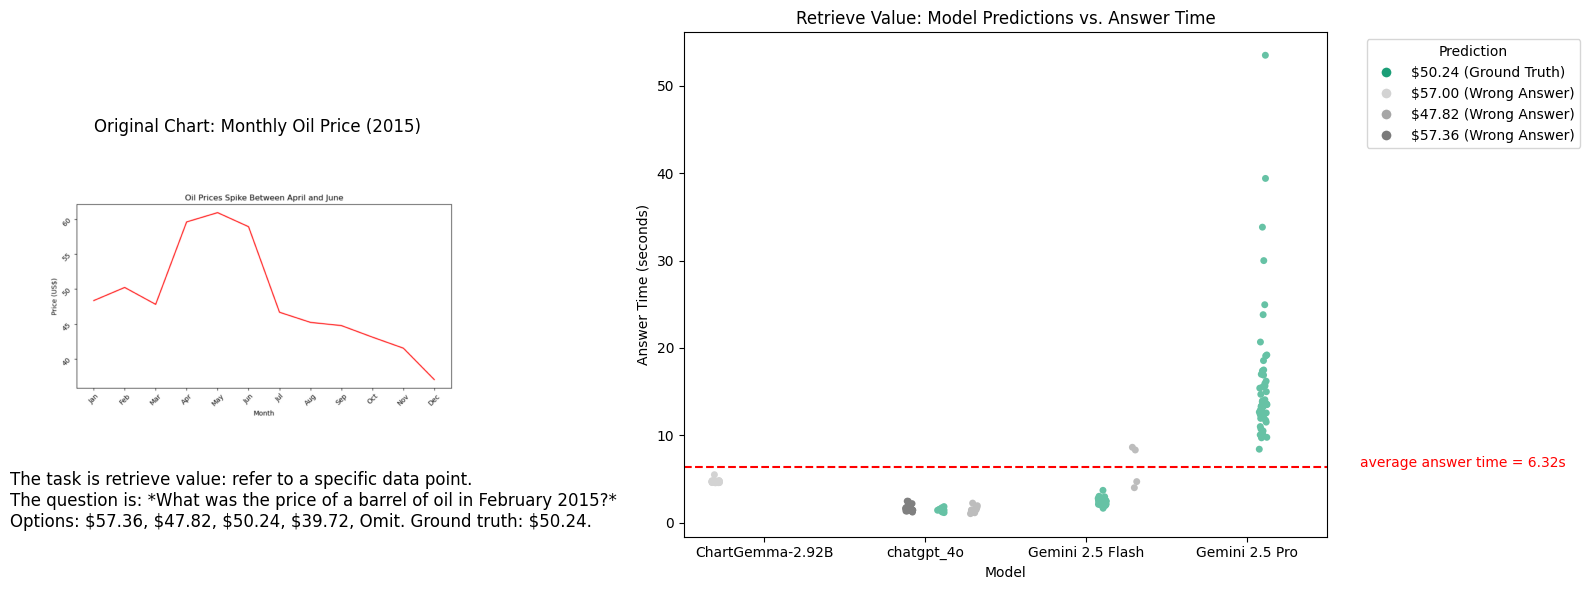

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from matplotlib.lines import Line2D
import numpy as np

# Label correct and incorrect predictions
merged_df['Prediction'] = merged_df['Prediction'].str.strip().str.rstrip('.')
merged_df['Prediction'] = merged_df['Prediction'].replace({
    "$50.24": "$50.24 (Ground Truth)",
    "$57.00": "$57.00 (Wrong Answer)",
    "$47.82": "$47.82 (Wrong Answer)",
    "$57.36": "$57.36 (Wrong Answer)"
})

# Define color palette
palette_custom = {
    "$50.24 (Ground Truth)": '#66c2a5',       # Green for correct
    "$57.00 (Wrong Answer)": 'lightgray',
    "$47.82 (Wrong Answer)": 'gray',
    "$57.36 (Wrong Answer)": '#bdbdbd'        # Another shade of gray
}

# Average answer time
avg_time = merged_df['Answer Time'].mean()


img = np.array(cropped_img)


# Create layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [1, 1.3]})

# --- Left: Chart image
ax1.imshow(img)
ax1.axis('off')
ax1.set_title("Original Chart: Monthly Oil Price (2015)", fontsize=12)

# Caption
caption = ("The task is retrieve value: refer to a specific data point.\n"
           "The question is: *What was the price of a barrel of oil in February 2015?*\n"
           "Options: $57.36, $47.82, $50.24, $39.72, Omit. Ground truth: $50.24.")

pos1 = ax1.get_position()
ax1.set_position([pos1.x0, pos1.y0 - 0.03, pos1.width, pos1.height])

ax1.text(
    0.0, -0.15, caption,
    ha='left',
    va='top',
    fontsize=12,
    transform=ax1.transAxes,
    wrap=True
)

# --- Right: Seaborn stripplot
sns.stripplot(
    data=merged_df,
    x='Model Name',
    y='Answer Time',
    hue='Prediction',
    dodge=True,
    jitter=True,
    palette=palette_custom,
    ax=ax2
)

ax2.set_title("Retrieve Value: Model Predictions vs. Answer Time", fontsize=12)
ax2.set_ylabel("Answer Time (seconds)")
ax2.set_xlabel("Model")

# Add average answer time line
ax2.axhline(y=avg_time, color='red', linestyle='--', linewidth=1.5)
ax2.text(
    x=len(merged_df['Model Name'].unique()) - 0.3,
    y=avg_time - 0.3,
    s=f"average answer time = {avg_time:.2f}s",
    color='red',
    fontsize=10,
    ha='left',
    va='bottom'
)

# Custom legend with new markerfacecolors (legend-only color change)
custom_legend = [
    Line2D([0], [0], marker='o', color='w', label='$50.24 (Ground Truth)', markerfacecolor='#1b9e77', markersize=8),      # deep green
    Line2D([0], [0], marker='o', color='w', label='$57.00 (Wrong Answer)', markerfacecolor='#d3d3d3', markersize=8),      # soft gray
    Line2D([0], [0], marker='o', color='w', label='$47.82 (Wrong Answer)', markerfacecolor='#a6a6a6', markersize=8),     # medium gray
    Line2D([0], [0], marker='o', color='w', label='$57.36 (Wrong Answer)', markerfacecolor='#7a7a7a', markersize=8)      # dark gray
]

ax2.legend(handles=custom_legend, title='Prediction', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Findings

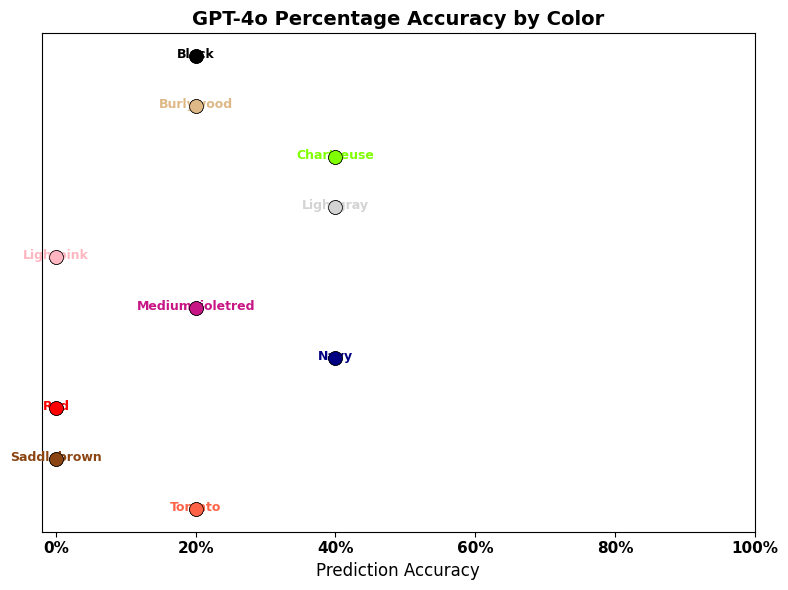

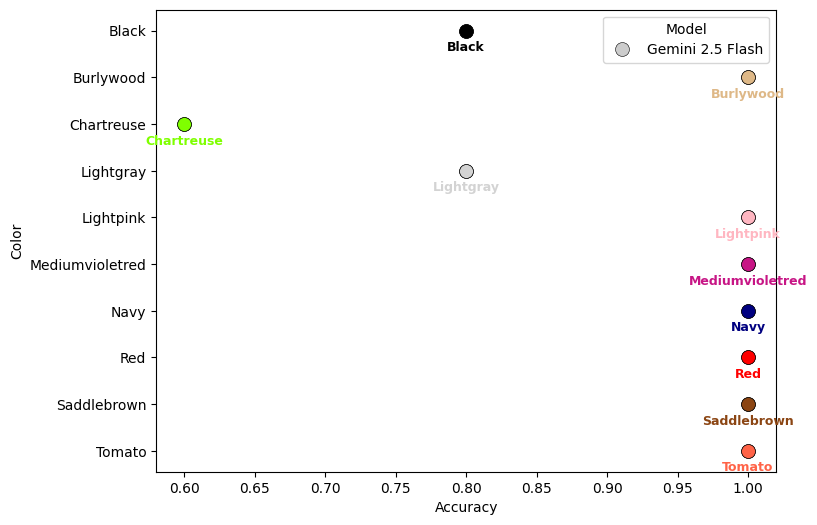

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === STEP 1: Prepare dot_df from merged_df ===

df = merged_df.copy()
df['Prediction'] = df['Prediction'].str.strip().str.rstrip('.')
df['Correct'] = df['Prediction'].str.contains('Ground Truth', case=False)

dot_df = (
    df.groupby(['Model Name', 'Color'])['Correct']
    .agg(['mean', 'count'])
    .rename(columns={'mean': 'Accuracy'})
    .reset_index()
    .rename(columns={'Model Name': 'Model'})
)

# === STEP 2: Define palettes ===

custom_palette = {
    'ChartGemma-2.92B': '#1b9e77',
    'chatgpt_4o': '#000000',
    'Gemini 2.5 Flash': '#cccccc',
    'Gemini 2.5 Pro': '#4d4d4d'
}

def get_bucket_label(acc):
    if acc == 0.0:
        return "0%"
    elif acc <= 0.2:
        return "20%"
    elif acc <= 0.4:
        return "40%"
    elif acc <= 0.6:
        return "60%"
    elif acc <= 0.8:
        return "80%"
    else:
        return "100%"

dot_df["AccuracyBucket"] = dot_df["Accuracy"].apply(get_bucket_label)
dot_df = dot_df[~dot_df['Model'].isin(['ChartGemma-2.92B', 'Gemini 2.5 Pro'])]

# === PLOT 1: chatgpt_4o ===

plt.figure(figsize=(8, 6))
sns.stripplot(
    data=dot_df[dot_df['Model'] == 'chatgpt_4o'],
    x='Accuracy',
    y='Color',
    hue='Model',
    dodge=True,
    jitter=0.15,
    size=10,
    palette={'chatgpt_4o': '#000000'},
    edgecolor='black',
    linewidth=0.4
)

y_offset = 0.5  # Adjust this to control label height above the dot

# Ensure 'Color' is treated as a categorical axis
dot_df['Color'] = pd.Categorical(dot_df['Color'])

# Annotate each chatgpt_4o point with color label
for idx, row in dot_df.iterrows():
    if row['Model'] == 'chatgpt_4o':
        # Draw the colored dot
        plt.scatter(
            x=row['Accuracy'],
            y=row['Color'],
            s=100,
            color=row['Color'].lower(),
            edgecolors='black',
            linewidths=0.5,
            zorder=5
        )

        # Get y-position using categorical index + offset
        y_pos = dot_df['Color'].cat.categories.get_loc(row['Color']) + y_offset

        # Add label above the dot
        plt.text(
            x=row['Accuracy'],
            y=y_pos,
            s=row['Color'],
            fontsize=9,
            ha='center',
            va='bottom',
            color=row['Color'].lower(),
            fontweight='bold'
        )

# Plot formatting
plt.title("GPT-4o Percentage Accuracy by Color", fontsize=14, weight='bold')
plt.xlabel("Prediction Accuracy", fontsize=12)
plt.ylabel("")        # Hide y-axis label
plt.yticks([])        # Hide y-axis tick labels
plt.xticks(
    [0.0, 0.2, 0.4, 0.6, 0.8, 1.0],
    ['0%', '20%', '40%', '60%', '80%', '100%'],
    fontsize=11,
    weight='bold'
)
plt.legend().remove()
plt.tight_layout()
plt.show()


# === PLOT 2: Gemini 2.5 Flash ===

plt.figure(figsize=(8, 6))
sns.stripplot(
    data=dot_df[dot_df['Model'] == 'Gemini 2.5 Flash'],
    x='Accuracy',
    y='Color',
    hue='Model',
    dodge=True,
    jitter=0.15,
    size=10,
    palette={'Gemini 2.5 Flash': '#cccccc'},
    edgecolor='black',
    linewidth=0.4
)


y_offset = 0.5  # move label upward

# Make sure 'Color' is treated as categorical
dot_df['Color'] = pd.Categorical(dot_df['Color'])

# Annotate each Gemini 2.5 Flash point with color label (with vertical offset)
for idx, row in dot_df.iterrows():
    if row['Model'] == 'Gemini 2.5 Flash':
        # Draw dot
        plt.scatter(
            x=row['Accuracy'],
            y=row['Color'],
            s=100,
            color=row['Color'].lower(),
            edgecolors='black',
            linewidths=0.5,
            zorder=5
        )

        # Get numeric y position based on category
        y_pos = dot_df['Color'].cat.categories.get_loc(row['Color']) + y_offset

        # Add label slightly above dot
        plt.text(
            x=row['Accuracy'],
            y=y_pos,
            s=row['Color'],
            fontsize=9,
            ha='center',
            va='bottom',
            color=row['Color'].lower(),
            fontweight='bold'
        )


